In [ ]:
# svc, scatter plot, svm, svr, predicting sexes with svr, svc, do without scaling and compare accuracy.

# SVC Model (Predicting sex using Puma Indian)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import svm
from mlxtend.plotting import plot_decision_regions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = "/content/drive/MyDrive/Six_Schools.xlsx"
df = pd.ExcelFile(filepath)

In [ ]:
df.sheet_names

['NCB22',
 'DSC21',
 'PES21',
 'PES22_A',
 'PES22_B',
 'NID20',
 'NID21',
 'KSP21',
 'KSP22',
 'Puma_Indian',
 'all_Schools',
 'RVU22']

In [ ]:
df_puma = df.parse('Puma_Indian', usecols=[Height_cm	Weight_Kg	Age	male'])
df_puma.head()

,Height_cm,Weight_Kg,Age,male,Sex,Unnamed: 5,Unnamed: 6,Unnamed: 7,ht_bin
0,53.9750,4.252425,0.0,0,F,NaN,53.975,NaN,50.0
1,55.8800,4.847765,0.0,0,F,NaN,179.070,NaN,60.0
2,56.5150,5.159609,0.0,0,F,NaN,NaN,NaN,70.0
3,59.6138,5.896696,1.0,0,F,NaN,NaN,NaN,80.0
4,60.4520,5.669900,1.0,1,M,NaN,NaN,NaN,90.0


In [ ]:
df_puma = df_puma[df_puma['Age'] >= 0]

In [ ]:
df_puma['Age']

0       0.0
1       0.0
2       0.0
3       1.0
4       1.0
       ... 
539    37.0
540    52.0
541    22.0
542    38.0
543    23.0
Name: Age, Length: 544, dtype: float64

In [ ]:
df_puma.shape

(544, 9)

In [ ]:
df_puma.describe()

,Height_cm,Weight_Kg,Age,male,Unnamed: 5,Unnamed: 6,Unnamed: 7,ht_bin
count,544.000000,544.000000,544.000000,544.000000,0.0,2.000000,0.0,14.000000
mean,138.263596,35.610618,29.344393,0.472426,NaN,116.522500,NaN,115.000000
std,27.602448,14.719178,20.746888,0.499699,NaN,88.455523,NaN,41.833001
min,53.975000,4.252425,0.000000,0.000000,NaN,53.975000,NaN,50.000000
25%,125.095000,22.007717,12.000000,0.000000,NaN,85.248750,NaN,82.500000
50%,148.590000,40.057844,27.000000,0.000000,NaN,116.522500,NaN,115.000000
75%,157.480000,47.209005,43.000000,1.000000,NaN,147.796250,NaN,147.500000
max,179.070000,62.992589,88.000000,1.000000,NaN,179.070000,NaN,180.000000


In [ ]:
df_puma.isnull().sum()

Height_cm       0
Weight_Kg       0
Age             0
male            0
Sex             0
Unnamed: 5    544
Unnamed: 6    542
Unnamed: 7    544
ht_bin        530
dtype: int64

<Axes: >

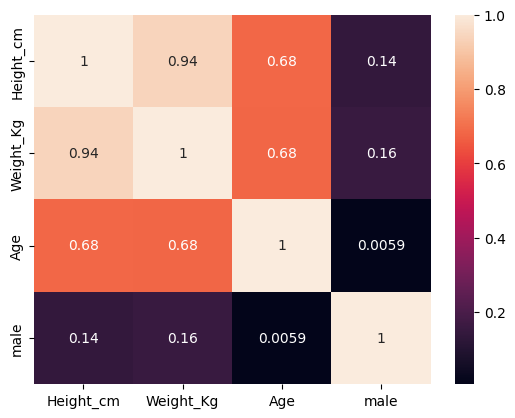

In [ ]:
sns.heatmap(df_puma[['Height_cm', 'Weight_Kg', 'Age', 'male']].corr(), annot = True)

In [ ]:
X = df_puma[['Height_cm', 'Weight_Kg']]
y = df_puma['male']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Creating classifier
classifier = SVC()

In [ ]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6605504587155964


In [ ]:
y_pred[:5]

array([1, 0, 0, 1, 1])

# SVM Special purpose plot

In [ ]:
X = df_puma[['Height_cm', 'Weight_Kg']] #age
y = df_puma['male']

In [ ]:
classifier = SVC(kernel='linear')

In [ ]:
classifier.fit(df_puma[['Height_cm', 'Weight_Kg']], df_puma['male'])

SVC(kernel='linear')

In [ ]:
# defining range of values for plot
height_min, height_max = df_puma['Height_cm'].min() - 1, df_puma['Height_cm'].max() + 1
weight_min, weight_max = df_puma['Weight_Kg'].min() - 1, df_puma['Weight_Kg'].max() + 1
# age_min, age_max = df_puma['Age'].min(), df_puma['Age'].max() + 1

In [ ]:
# grid of points to evaluate the classifier
height_range = np.arange(height_min, height_max, 0.1)
weight_range = np.arange(weight_min, weight_max, 0.1)
# age_range = np.arange(age_min, age_max, 0.1)

In [ ]:
age_range.min()

0.0

In [ ]:
df_puma.to_numpy().flatten()

array([53.975, 4.252425, 0.0, ..., nan, nan, nan], dtype=object)

In [ ]:
df_puma.head()

,Height_cm,Weight_Kg,Age,male,Sex,Unnamed: 5,Unnamed: 6,Unnamed: 7,ht_bin
0,53.9750,4.252425,0.0,0,F,NaN,53.975,NaN,50.0
1,55.8800,4.847765,0.0,0,F,NaN,179.070,NaN,60.0
2,56.5150,5.159609,0.0,0,F,NaN,NaN,NaN,70.0
3,59.6138,5.896696,1.0,0,F,NaN,NaN,NaN,80.0
4,60.4520,5.669900,1.0,1,M,NaN,NaN,NaN,90.0


In [ ]:
age_range

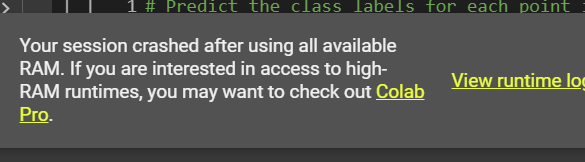

**Reasons it may be going wrong:**

*  The code is messing up at meshgrid line.
*  Process could be running out of memory due to something fudging up in the code.
*  Running out of ram on this smol dataset is sus
*  After thinking through, doesn't look like a resource limit hit.
*  It may be entering some sort of infinite loop or something.
*  Checked it after Flattening it.
*  The age range seems to be a problem with that -1. It's a number, it should work tho?
*  The Meshgrid is unable to use this age range probably.

**Quick Fixes:**

*  Flattening and checking each variable after every line of code before meshgrid.
*  Checking the age_range and found negative values, printing and finding out more. Chucking negative ages from the dataset.

Results:

*  Okay, filtering negative values didn't work.


In [ ]:
xx, yy = np.meshgrid(height_range, weight_range) #zz age_range
# xx = np.meshgrid(height_range)
# yy = np.meshgrid(weight_range)
# zz = np.meshgrid(age_range)

In [ ]:
# Flatten the grid points and create feature vectors
points = np.c_[xx.ravel(), yy.ravel()] # zz.ravel()

In [ ]:
# Predict the class labels for each point in the grid
Z = classifier.predict(points)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
# Reshape the predictions to match the grid shape
Z = Z.reshape(xx.shape)

Text(0.5, 1.0, 'Decision Boundary Plot')

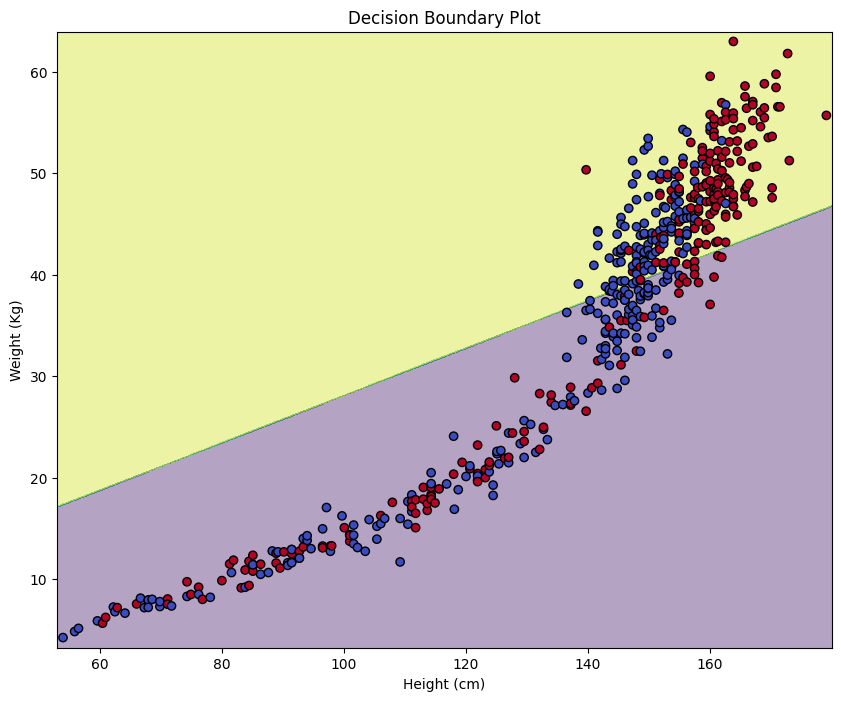

In [ ]:
# Plot the decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4) #Z[:, :, 0],
# Plot the data points
plt.scatter(df_puma['Height_cm'], df_puma['Weight_Kg'], c=df_puma['male'], cmap='coolwarm', edgecolors='k')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (Kg)')
plt.title('Decision Boundary Plot')

# Using another dataset for the same

Since Puma indian gave errors, trying with another dataset if it works


In [ ]:
df_ksp = df.parse('KSP22')
df_ksp.head()

,ID,Sex,Age,Home_state,Home_town,Mother_tongue,Height_cm,Weight_Kg,BMI,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,2601,F,33,UP,Noida,Hindi,170,73,25.259516,NaN,NaN,Height_cm,Weight_Kg,BMI
1,1332,M,24,West Bengal,Barddhaman,Bengali,171,72,24.622961,NaN,Height_cm,1,NaN,NaN
2,1350,M,25,Uttarakhand,Dehradun,Hindi,172,80,27.041644,NaN,Weight_Kg,0.710777,1,NaN
3,2213,F,36,Maharashtra,Mumbai,Bengali,157,55,22.313278,NaN,BMI,0.303973,0.882849,1
4,2562,M,23,Gujarat,Rajkot,Gujarati,172,64,21.633315,NaN,NaN,NaN,NaN,NaN


In [ ]:
def convert_binary(df, column):
  df[column] = df[column].map({'M': 1, 'F': 0})

In [ ]:
convert_binary(df_ksp, 'Sex')

In [ ]:
df_ksp.tail()

,ID,Sex,Age,Home_state,Home_town,Mother_tongue,Height_cm,Weight_Kg,BMI,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
12,2903,0,31,Telangana,Hyderabad,Telugu,172,72,24.337480,NaN,NaN,NaN,NaN,NaN
13,2230,0,21,Uttar Pradesh,Lucknow,Hindi,157,47,19.067711,NaN,NaN,NaN,NaN,NaN
14,2348,1,24,MP,Burhanpur,Hindi,168,73,25.864512,NaN,NaN,NaN,NaN,NaN
15,1365,1,22,Telangana,Hyderabad,Telugu,164,84,31.231410,NaN,NaN,NaN,NaN,NaN
16,1526,0,28,Rajasthan,Jaipur,English,147,61,28.228979,NaN,NaN,NaN,NaN,NaN


In [ ]:
X = df_ksp[['Height_cm', 'Weight_Kg']]
y = df_ksp['Sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5


In [ ]:
y_pred[:5]

array([1, 1, 1, 1])

In [ ]:
# trying to plot special purpose plot
classifier = SVC(kernel='linear')

In [ ]:
classifier.fit(df_ksp[['Height_cm', 'Weight_Kg']], df_ksp['Sex'])

SVC(kernel='linear')

In [ ]:
height_min, height_max = df_ksp['Height_cm'].min() - 1, df_ksp['Height_cm'].max() + 1
weight_min, weight_max = df_ksp['Weight_Kg'].min() - 1, df_ksp['Weight_Kg'].max() + 1

In [ ]:
height_range = np.arange(height_min, height_max, 0.1)
weight_range = np.arange(weight_min, weight_max, 0.1)
xx, yy = np.meshgrid(height_range, weight_range)

In [ ]:
points = np.c_[xx.ravel(), yy.ravel()]

In [ ]:
Z = classifier.predict(points)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
Z = Z.reshape(xx.shape)

Reason of not working: did not pass Z in the plt.contouf

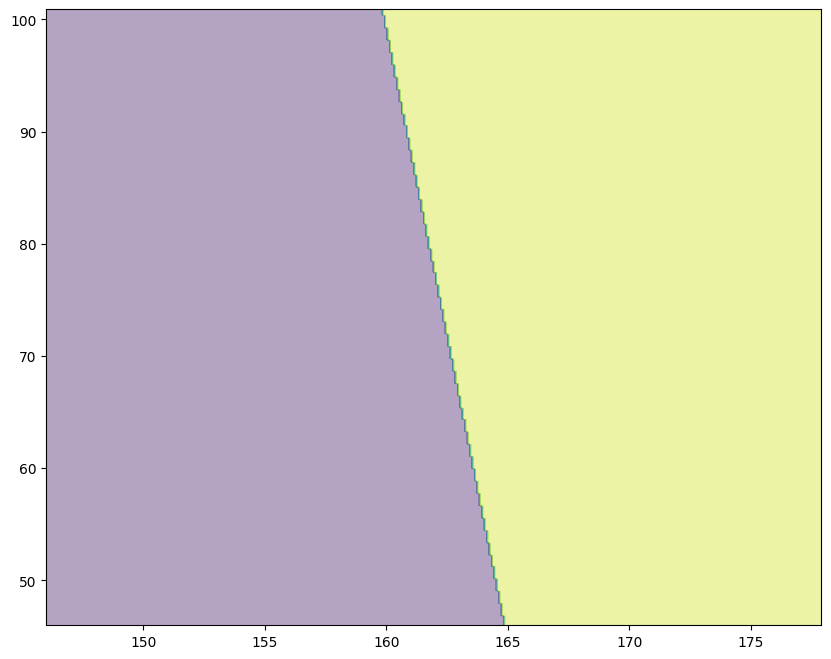

In [ ]:
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4)

Text(0.5, 1.0, 'Decision Boundary Plot')

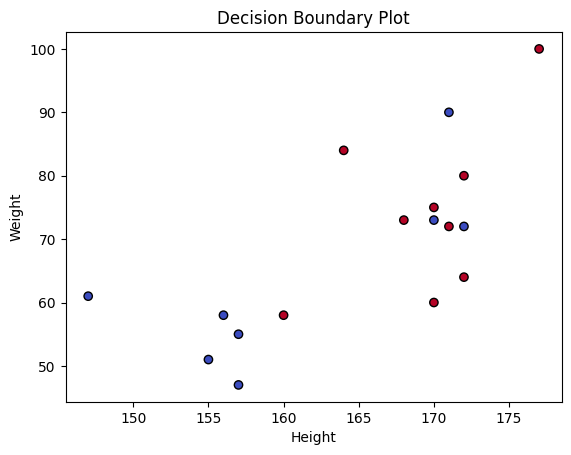

In [ ]:
plt.scatter(df_ksp['Height_cm'], df_ksp['Weight_Kg'], c=df_ksp['Sex'], cmap='coolwarm', edgecolors='k')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Decision Boundary Plot')

Text(0.5, 1.0, 'Decision Boundary Plot')

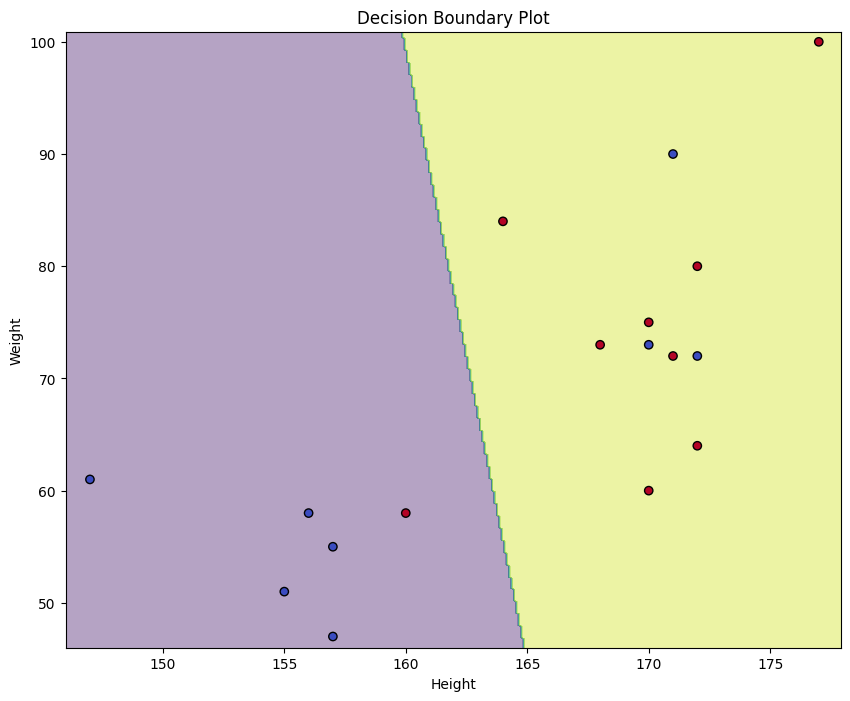

In [ ]:
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(df_ksp['Height_cm'], df_ksp['Weight_Kg'], c=df_ksp['Sex'], cmap='coolwarm', edgecolors='k')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Decision Boundary Plot')

# Trying SVC with Puma Indian

Trying a 3D plot again with Puma Indian but dividing into age groups to smaller sizes and process and then throw them all together.

In [ ]:
age1 = df_puma['Age'] < 13
age2 = (df_puma['Age'] >= 13) & (df_puma['Age'] <= 27)
age3 = (df_puma['Age'] >= 28) & (df_puma['Age'] <= 44)
age4 = df_puma['Age'] > 44

In [ ]:
df_group1 = df_puma[age1]
df_group2 = df_puma[age2]
df_group3 = df_puma[age3]
df_group4 = df_puma[age4]

In [ ]:
X = df_group1[['Height_cm', 'Weight_Kg', 'Age']]
y = df_group1['male']

In [ ]:
classifier = SVC(kernel='linear')

In [ ]:
classifier.fit(df_group1[['Height_cm', 'Weight_Kg', 'Age']], df_group1['male'])

SVC(kernel='linear')

In [ ]:
height_min, height_max = df_group1['Height_cm'].min() - 1, df_group1['Height_cm'].max() + 1
weight_min, weight_max = df_group1['Weight_Kg'].min() - 1, df_group1['Weight_Kg'].max() + 1
age_min, age_max = df_group1['Age'].min(), df_group1['Age'].max() + 1

In [ ]:
height_range = np.arange(height_min, height_max, 0.1)
weight_range = np.arange(weight_min, weight_max, 0.1)
age_range = np.arange(age_min, age_max, 0.1)

In [ ]:
xx, yy, zz = np.meshgrid(height_range, weight_range, age_range) #zz age_range

In [ ]:
points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()] # zz.ravel()

In [ ]:
Z = classifier.predict(points)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
Z = Z.reshape(xx.shape)

Text(0.5, 1.0, 'Decision Boundary Plot')

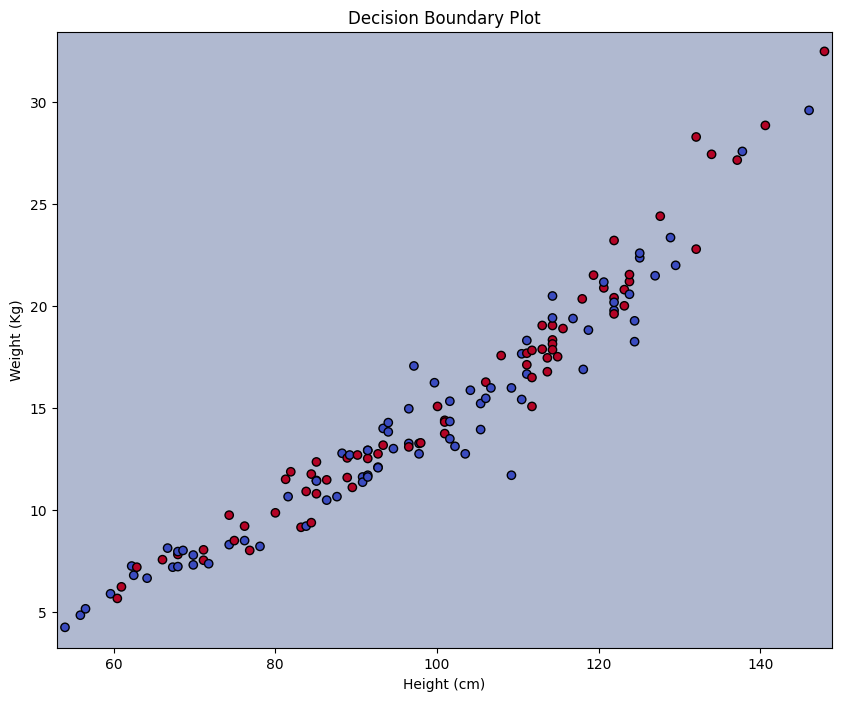

In [ ]:
plt.figure(figsize=(10, 8))
plt.contourf(xx[:, :, 0], yy[:, :, 0], zz[:, :, 0], alpha=0.4) #Z[:, :, 0],
# Plot the data points
plt.scatter(df_group1['Height_cm'], df_group1['Weight_Kg'], c=df_group1['male'], cmap='coolwarm', edgecolors='k')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (Kg)')
plt.title('Decision Boundary Plot')

Nice, it worked for smol dataset. Apparently, all resources are used and it crashes with the entire dataset in use. To work around it, we could split it into smaller dfs and put them together. How?

# Predict without Scaling
Using Puma Indian Dataset

In [ ]:
X = df_puma[['Height_cm', 'Weight_Kg']]
y = df_puma['male']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
classifier = SVC(kernel='linear')

In [ ]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6055045871559633


In [ ]:
y_pred[:5]

array([1, 1, 0, 1, 1])

<h3>Plotting/Visualization</h3>

In [ ]:
height_min, height_max = df_puma['Height_cm'].min() - 1, df_puma['Height_cm'].max() + 1
weight_min, weight_max = df_puma['Weight_Kg'].min() - 1, df_puma['Weight_Kg'].max() + 1

In [ ]:
height_range = np.arange(height_min, height_max, 0.1)
weight_range = np.arange(weight_min, weight_max, 0.1)
xx, yy = np.meshgrid(height_range, weight_range)

In [ ]:
points = np.c_[xx.ravel(), yy.ravel()]

In [ ]:
Z = classifier.predict(points)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
Z = Z.reshape(xx.shape)

Text(0.5, 1.0, 'Decision Boundary Plot')

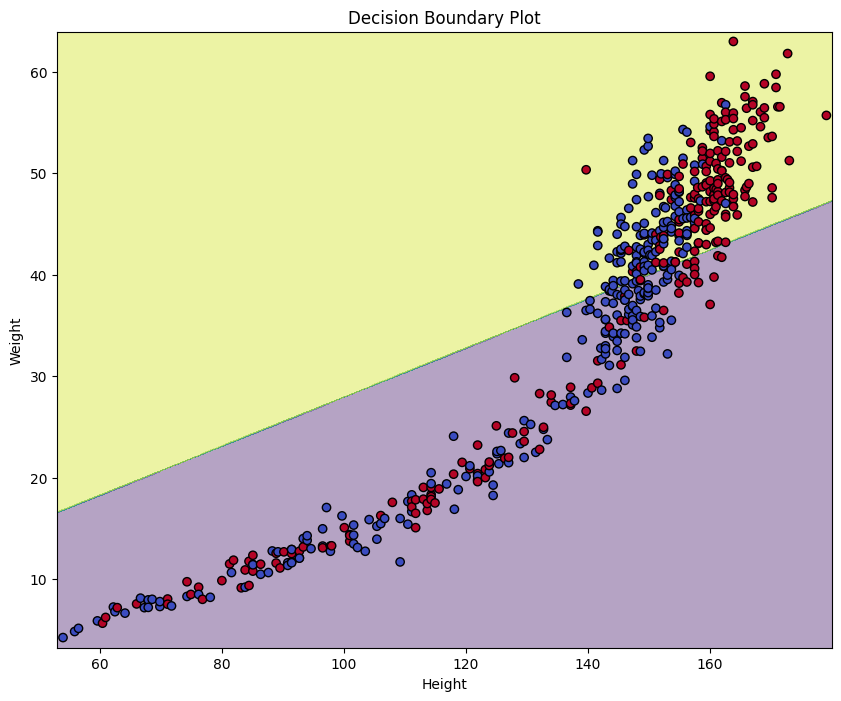

In [ ]:
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(df_puma['Height_cm'], df_puma['Weight_Kg'], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Decision Boundary Plot')

In [ ]:
points = np.c_[xx.ravel(), yy.ravel()]

In [ ]:
Z = classifier.decision_function(points)
Z = Z.reshape(xx.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Maximum Margin Separating Hyperplane')

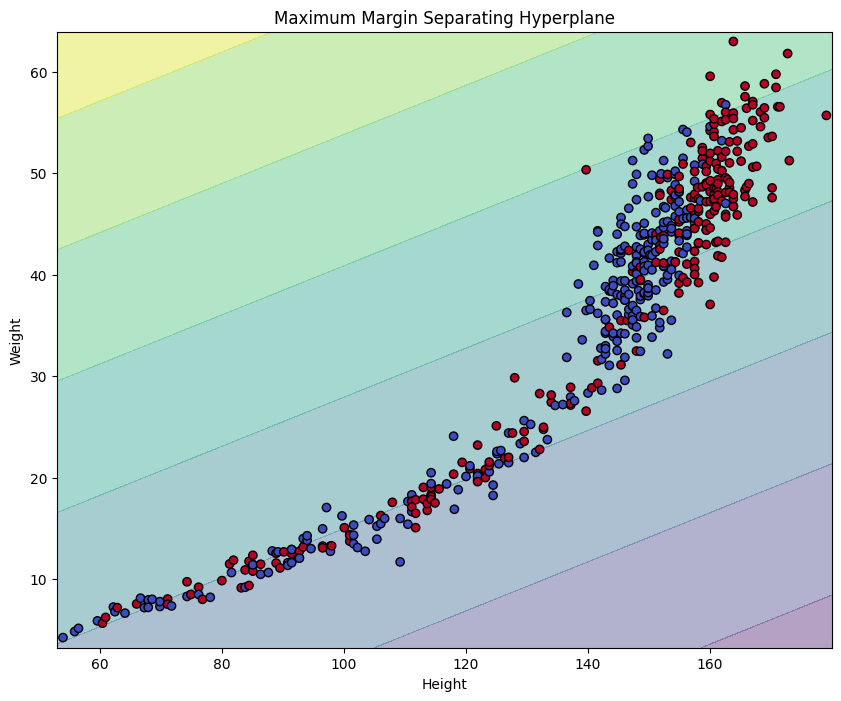

In [ ]:
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(df_puma['Height_cm'], df_puma['Weight_Kg'], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Maximum Margin Separating Hyperplane')

# Predict with Scaling
Using Puma Indian

In [ ]:
X = df_puma[['Height_cm', 'Weight_Kg']].values
y = df_puma['male'].values

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [ ]:
clf = svm.SVC(kernel='linear')

In [ ]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred[:5]

array([1, 1, 1, 1, 1])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5955882352941176


<h3>Plotting/Visualisation</h3>

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
classifier = SVC(kernel='linear')

In [ ]:
classifier.fit(X_scaled, y)

SVC(kernel='linear')

In [ ]:
height_min, height_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
weight_min, weight_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

In [ ]:
height_range = np.arange(height_min, height_max, 0.1)
weight_range = np.arange(weight_min, weight_max, 0.1)
xx, yy = np.meshgrid(height_range, weight_range)

In [ ]:
points = np.c_[xx.ravel(), yy.ravel()]

In [ ]:
points_scaled = scaler.transform(points)

In [ ]:
Z = classifier.predict(points_scaled)

In [ ]:
Z = Z.reshape(xx.shape)

Text(0.5, 1.0, 'Decision Boundary Plot')

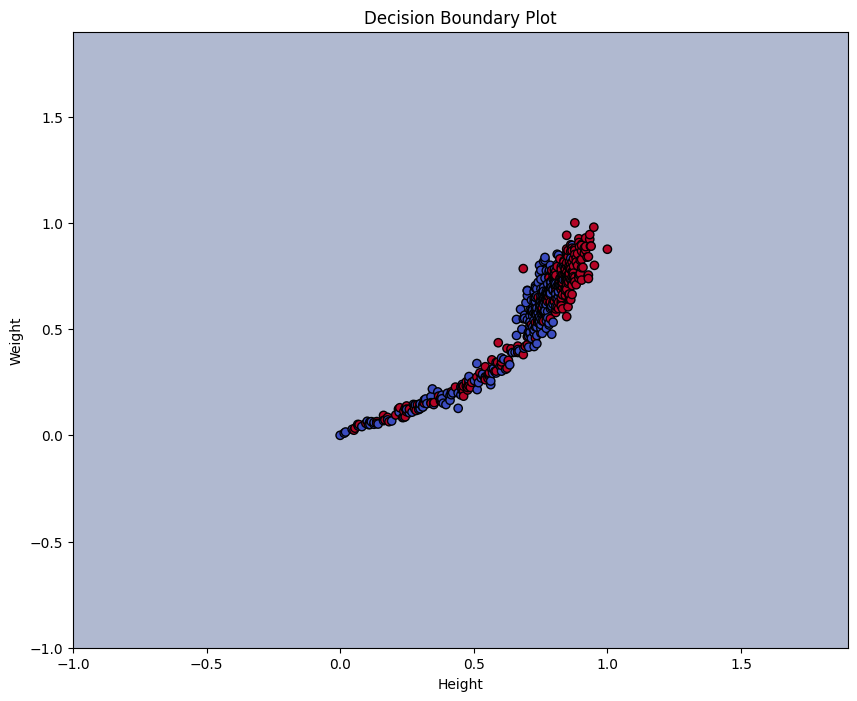

In [ ]:
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Decision Boundary Plot')